In [ ]:
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt

In [ ]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [ ]:
start = '1926-01-01'

In [ ]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

<ipython-input-4-9dc53ce49e87>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()
<ipython-input-4-9dc53ce49e87>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()


In [ ]:
ff_df=ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

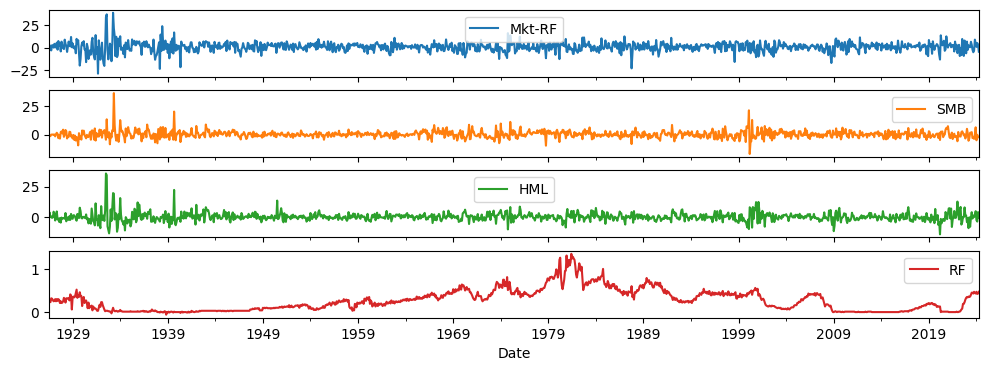

In [ ]:
ff_df.plot(subplots=True,figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

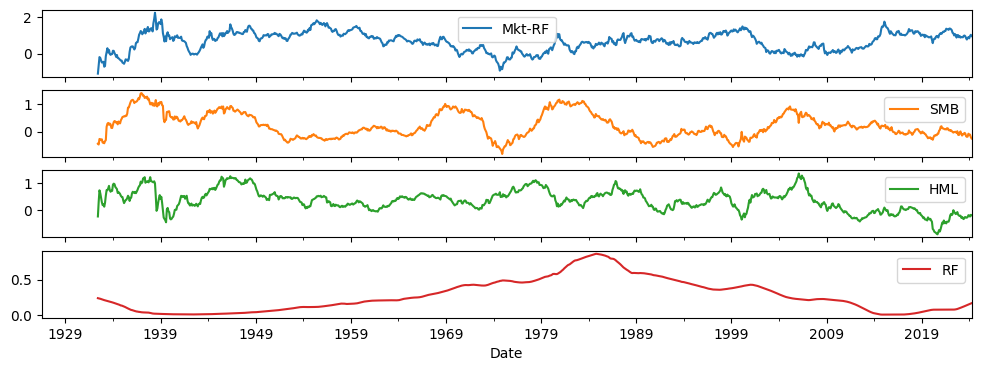

In [ ]:
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [ ]:
ff_mom_df= pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]

<ipython-input-8-c32665da746e>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df= pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]
<ipython-input-8-c32665da746e>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df= pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]


array([<Axes: xlabel='Date'>], dtype=object)

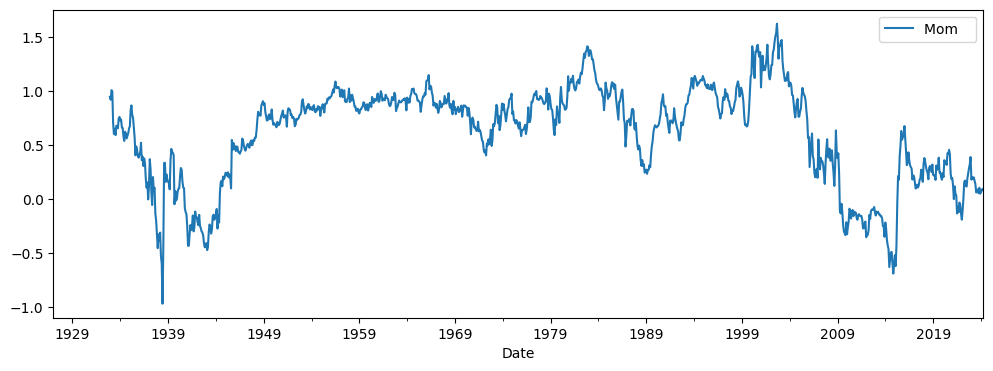

In [ ]:
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

merge all the risk factor data in to one data frame


In [ ]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-12,4.87,6.34,4.93,0.43
2024-01,0.70,-5.09,-2.38,0.47
2024-02,5.06,-0.24,-3.49,0.42


In [ ]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2023-12,-5.51
2024-01,5.11
2024-02,4.99


In [ ]:
ffac_merged_df=pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False,validate='one_to_one')

In [ ]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-12,4.87,6.34,4.93,0.43,-5.51
2024-01,0.70,-5.09,-2.38,0.47,5.11
2024-02,5.06,-0.24,-3.49,0.42,4.99


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
AAPL_data=pandas_datareader.data.get_data_yahoo('AAPL',start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158163
                ...   
2024-02-29   -0.018543
2024-03-31   -0.051286
2024-04-30   -0.006706
2024-05-31    0.130222
2024-06-30    0.082653
Freq: M, Name: Adj Close, Length: 523, dtype: float64

In [ ]:
AAPL_df=AAPL_data.to_frame()

In [ ]:
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158163
...,...
2024-02-29,-0.018543
2024-03-31,-0.051286
2024-04-30,-0.006706


In [ ]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [ ]:
ffac_merged_df.index.dtype

period[M]

reindex the data frame to make the data compatible

In [ ]:
AAPL_df['str_date']=AAPL_df.index.astype(str)
AAPL_df['dt_date']=pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

UPER YE BSS ISLIYE KIYA H TAAKI STRING BAAD M CHANGE KR SKE


In [ ]:
AAPL_df.dt_date.dtype

dtype('O')

same kind of data bnane k liye kiya h


In [ ]:
ffac_merged_df['str_date']=ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date']=pd.to_datetime(ffac_merged_df['str_date']). dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [ ]:
AAPL_ffac_merged_df=pd.merge(AAPL_df,ffac_merged_df,how='inner',on='dt_date',sort=True,copy=True,indicator=False,validate='one_to_one')

In [ ]:
AAPL_ffac_merged_df

,Adj Close,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74
4,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91
...,...,...,...,...,...,...,...
516,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51
517,-0.042227,2024-01,0.70,-5.09,-2.38,0.47,5.11
518,-0.018543,2024-02,5.06,-0.24,-3.49,0.42,4.99
519,-0.051286,2024-03,2.83,-2.49,4.19,0.43,-0.41


In [ ]:
AAPL_ffac_merged_df.drop(columns=['str_date_x','str_date_y'],inplace=True)

In [ ]:
AAPL_ffac_merged_df.rename(columns={'Adj Close':'AAPL'},inplace=True)

In [ ]:
AAPL_ffac_merged_df['AAPL_RF']= AAPL_ffac_merged_df['AAPL']*100 -AAPL_ffac_merged_df['RF']

In [ ]:
AAPL_ffac_merged_df.dropna(axis=0,inplace=True)

In [ ]:
AAPL_ffac_merged_df.rename(columns={'Mom   ':'Mom'},inplace=True)

In [ ]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merged_df['AAPL_RF'],AAPL_ffac_merged_df[['Mkt-RF','SMB','HML','Mom']],missing='drop').fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              53.32
Date:                Tue, 25 Jun 2024   Prob (F-statistic):                    1.31e-37
Time:                        11:25:04   Log-Likelihood:                         -1977.6
No. Observations:                 520   AIC:                                      3963.
Df Residuals:                     516   BIC:                                      3980.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2605      0.112     11.281      0.000       1.041       1.480
SMB            0.2292      0.167      1.376      0.169      -0.098       0.556
HML           -0.8256      0.160     -5.154      0.000      -1.140      -0.511
Mom           -0.0538      0.113     -0.475      0.635      -0.276       0.169
==============================================================================
Omnibus:                       16.571   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.311
Skew:                          -0.042   Prob(JB):                     1.30e-08
Kurtosis:                       4.292   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.tools
AAPL_ffac_merged_df_c= statsmodels.tools.add_constant(AAPL_ffac_merged_df,prepend=True)

In [ ]:
AAPL_ffac_merged_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256292
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264313
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757516
4,1.0,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736279
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589808
...,...,...,...,...,...,...,...,...,...
516,1.0,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51,0.928255
517,1.0,-0.042227,2024-01,0.70,-5.09,-2.38,0.47,5.11,-4.692719
518,1.0,-0.018543,2024-02,5.06,-0.24,-3.49,0.42,4.99,-2.274313
519,1.0,-0.051286,2024-03,2.83,-2.49,4.19,0.43,-0.41,-5.558632


In [ ]:
results = OLS(AAPL_ffac_merged_df['AAPL_RF'],AAPL_ffac_merged_df_c[['const','Mkt-RF','SMB','HML','Mom']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           9.78e-37
Time:                        11:29:36   Log-Likelihood:                -1973.6
No. Observations:                 520   AIC:                             3957.
Df Residuals:                     515   BIC:                             3979.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3772      0.490      2.809      0.005       0.414       2.340
Mkt-RF         1.1963      0.113     10.555      0.000       0.974       1.419
SMB            0.2290      0.165      1.384      0.167      -0.096       0.554
HML           -0.8929      0.161     -5.549      0.000      -1.209      -0.577
Mom           -0.1093      0.114     -0.957      0.339      -0.334       0.115
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.912
Skew:                          -0.039   Prob(JB):                     4.33e-08
Kurtosis:                       4.249   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""